In [213]:
import pickle as pkl
import pandas as pd
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [214]:
tempFolder = '/home/ak/Documents/Research/temp/'
pickleFiles = [s for s in os.listdir(tempFolder) if ".pkl" in s]

In [227]:
symbols = [pickleFiles[s].split(".")[0] for s in range(len(pickleFiles))]
symbolsSet = list(set(symbols))

In [240]:
pickleFiles

['BARC.L_one_day_ahead_average_kernel_results.pkl',
 'BARC.L_one_day_ahead_multiple_kernel_results.pkl',
 'APF.L_one_day_ahead_average_kernel_results.pkl',
 'BLT.L_one_day_ahead_multiple_kernel_results.pkl',
 'APF.L_one_day_ahead_multiple_kernel_results.pkl',
 'BLT.L_one_day_ahead_average_kernel_results.pkl']

In [279]:
mkldict=dict()
avgdict=dict()
testaccuracyMKL =dict()
symbolidx=2
for symbolidx, _ in enumerate(symbolsSet):
    pickleFileSymbolAvg = "".join((tempFolder,"".join((symbolsSet[symbolidx],'.L_one_day_ahead_average_kernel_results.pkl'))))
    pickleFileSymbolMKL = "".join((tempFolder,"".join((symbolsSet[symbolidx],'.L_one_day_ahead_multiple_kernel_results.pkl'))))
    mklfile = pkl.load(open(pickleFileSymbolMKL, "rb"), encoding='latin1')
    avgfile = pkl.load(open(pickleFileSymbolAvg, "rb"), encoding='latin1')
    
    mkldict[symbolsSet[symbolidx]] =mklfile['f1_score']
    avgdict[symbolsSet[symbolidx]] =avgfile['f1_score']
    testaccuracyMKL[symbolsSet[symbolidx]] =avgfile['test_accuracy']
                           
    

In [233]:
f1scores =dict()
testaccuracy =dict()

pklidx=1
mklResults = "".join((tempFolder,pickleFiles[1]))
avgResults = "".join((tempFolder,pickleFiles[0]))
print(pickleFiles[pklidx].split(".")[0])

BARC


In [262]:
df=pd.DataFrame()
# df['BARC'] =np.array(mkldict['BARC'])
# df['APF'] =np.array(mkldict['APF'])
# # df['BLT']=mkldict['BLT']
# df =pd.DataFrame({'BARC': pd.Series(a), 'b': pd.Series(b)})
df =pd.DataFrame.from_dict({'BARC': mkldict['BARC'], 'APF': mkldict['APF'], 'BLT':mkldict['BLT']}, orient='index').T

In [288]:
dfaccuracies=pd.DataFrame()
dfaccuracies=pd.DataFrame.from_dict({'BARC': testaccuracyMKL['BARC'],'APF': testaccuracyMKL['APF'],'BLT':testaccuracyMKL['BLT'] }, orient='index').T

In [291]:
dfMeanAccuracy =df.describe().loc[["mean", "std", "50%"]].T.round(2).style.format({'mean': "{:.2f}",'std': "{:.2f}",'50%': "{:.2%}"})

In [294]:
dfMeanAccuracy

,mean,std,50%
BARC,0.63,0.07,62.00%
APF,0.85,0.12,85.00%
BLT,0.60,0.11,55.00%


In [276]:
dfmeans =df.describe().loc[["mean", "std", "50%"]].T.round(2)
dfmeans.style.format({'mean': "{:.2f}",'std': "{:.2f}",'50%': "{:.2%}"})
print (dfmeans.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  mean &   std &   50\% \\
\midrule
BARC &  0.63 &  0.07 &  0.62 \\
APF  &  0.85 &  0.12 &  0.85 \\
BLT  &  0.60 &  0.11 &  0.55 \\
\bottomrule
\end{tabular}



In [277]:
dfmeans.T

,BARC,APF,BLT
mean,0.63,0.85,0.60
std,0.07,0.12,0.11
50%,0.62,0.85,0.55


In [99]:
mklResultsFile = pkl.load(open(mklResults, "rb"), encoding='latin1')
avgResultsFile = pkl.load(open(avgResults, "rb"), encoding='latin1')

In [100]:
mklKeys = list(mklResultsFile.keys())
avgKeys = list(avgResultsFile.keys())

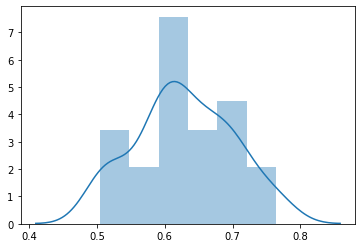

In [164]:
f1x =mklResultsFile['f1_score']

sns.distplot(f1x);
df1x = pd.DataFrame(f1x)

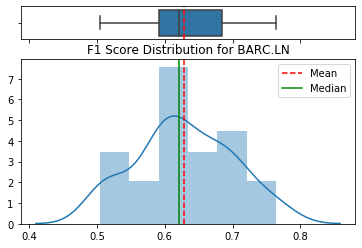

In [205]:
f,axarr = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=np.mean(df1x.values)
median=np.median(df1x.values)
sns.boxplot(df1x, ax=axarr[0])
axarr[0].axvline(mean, color='r', linestyle='--')
sns.distplot(df1x, ax=axarr[1])
axarr[1].axvline(mean, color='r', linestyle='--')
axarr[1].axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
plt.title('F1 Score Distribution for BARC.LN')

_=axarr[0].set(xlabel='')
plt.show()
f1FileLoc = "".join((destinationFolder,"".join(('BARC.L_','F1_Distribution.png') )))
f.savefig(f1FileLoc )


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('myfigures.pdf') as pdf:
for i in range(1000):

    plt.subplots(2, 3)
    axarr[0, 0].plot(x1, y1)
    axarr[1, 0].plot(x2, y2)

    pdf.savefig(f)
    plt.close('all')

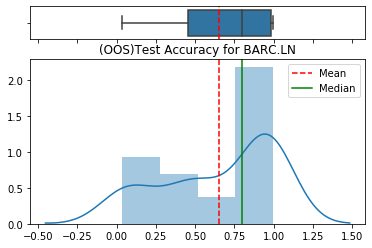

In [211]:
df1y = pd.DataFrame(mklResultsFile['test_accuracy'])

f,axarr = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=np.mean(df1y.values)
median=np.median(df1y.values)
sns.boxplot(df1y, ax=axarr[0])
axarr[0].axvline(mean, color='r', linestyle='--')
sns.distplot(df1y, ax=axarr[1])
axarr[1].axvline(mean, color='r', linestyle='--')
axarr[1].axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
plt.title('(OOS)Test Accuracy for BARC.LN')

_=axarr[0].set(xlabel='')
plt.show()
f1FileLoc = "".join((destinationFolder,"".join(('BARC.L_','test_accuracy.png') )))
f.savefig(f1FileLoc )

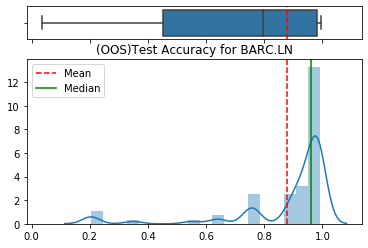

In [212]:
df1z = pd.DataFrame(avgResultsFile['test_accuracy'])

f,axarr = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=np.mean(df1z.values)
median=np.median(df1z.values)
sns.boxplot(df1y, ax=axarr[0])
axarr[0].axvline(mean, color='r', linestyle='--')
sns.distplot(df1z, ax=axarr[1])
axarr[1].axvline(mean, color='r', linestyle='--')
axarr[1].axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
plt.title('(OOS)Test Accuracy for BARC.LN')

_=axarr[0].set(xlabel='')
plt.show()
f1FileLoc = "".join((destinationFolder,"".join(('BARC.L_','test_accuracy.png') )))
f.savefig(f1FileLoc )

In [125]:
tprList = mklResultsFile['tpr']
fprList = mklResultsFile['fpr']

avgtprList = avgResultsFile['tpr']
avgfprList = avgResultsFile['fpr']

In [105]:
mklResultsFile['auc']

[]

In [135]:
idx=14
## multiple kernel ##
tprMKL = tprList[idx]
fprMKL = fprList[idx]
aucMKL= auc(fprMKL,tprMKL)
## average kernel ##
tprAVG =avgtprList[idx]
fprAVG = avgfprList[idx]
avgAUC = auc(avgfprItem, avgtprItem)

In [131]:
from sklearn.metrics import roc_curve, auc


In [133]:
import numpy as np
len(tprList[4])
len(tprList[5])

83

In [148]:
def ROC_Graph(fprAVG, tprAVG,fprMKL, tprMKL):
    aucMKL= auc(fprMKL,tprMKL)
    avgAUC = auc(fprAVG, tprAVG)
    fig = plt.figure()
    lw = 2
    plt.plot(fprAVG, tprAVG, color='darkred',lw=lw, label='Avg Kernel ROC curve (area = %0.2f)' % avgAUC)
    plt.plot(fprMKL, tprMKL, color='darkorange',
             lw=lw, label='MKL ROC curve (area = %0.2f)' % aucMKL)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('MKL Receiver operating characteristic: MKL vs Average Kernel ')
    plt.legend(loc="lower right")
    return fig 

plt.show()

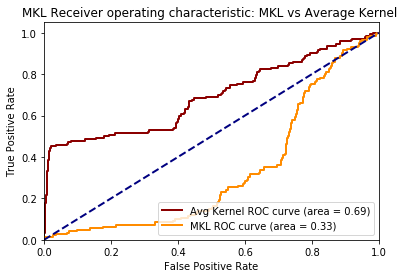

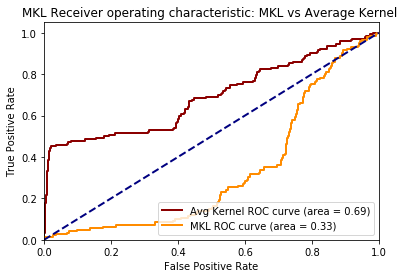

In [150]:
ROC_Graph(fprAVG, tprAVG,fprMKL, tprMKL)

In [143]:
os.getcwd()

'/home/ak/Documents/Research/PaperCode'

/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


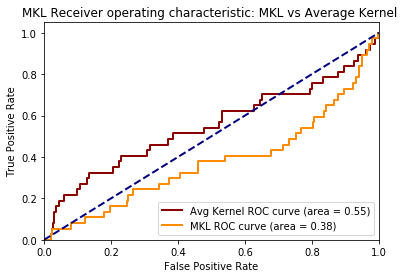

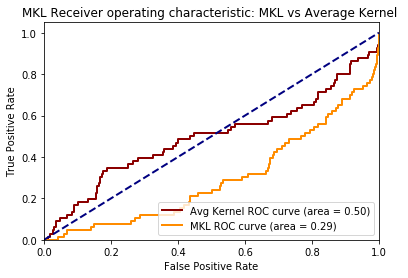

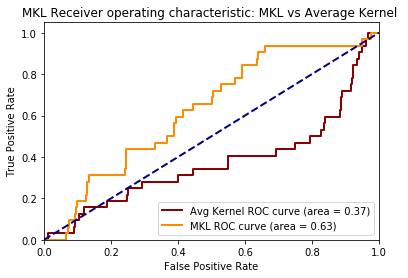

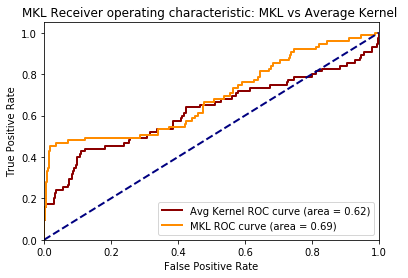

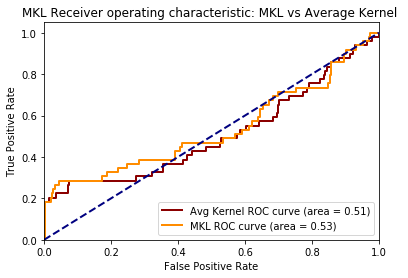

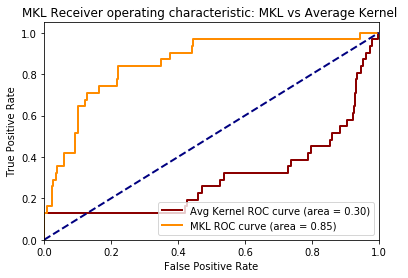

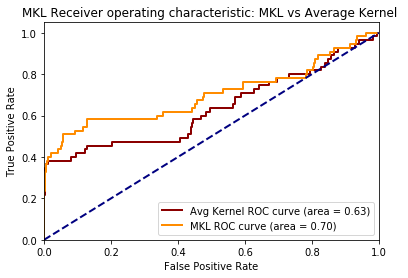

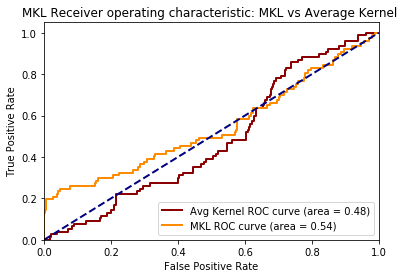

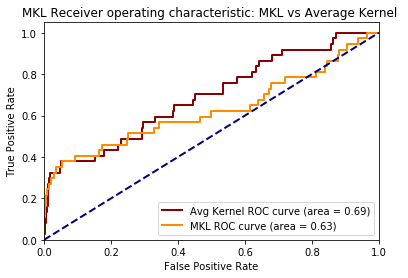

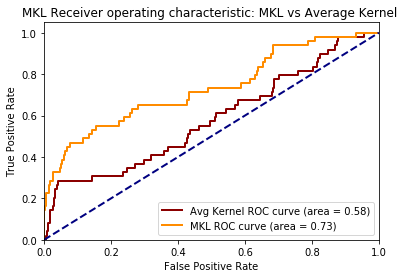

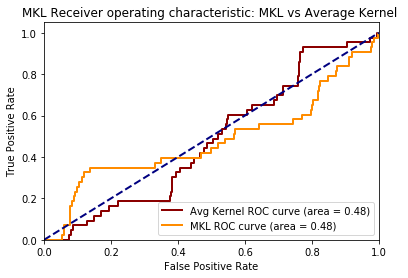

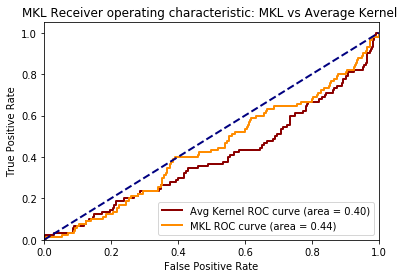

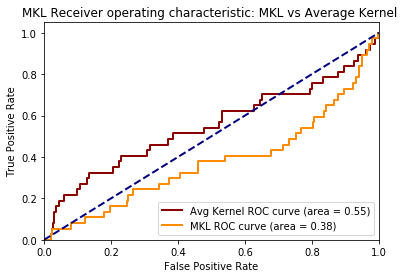

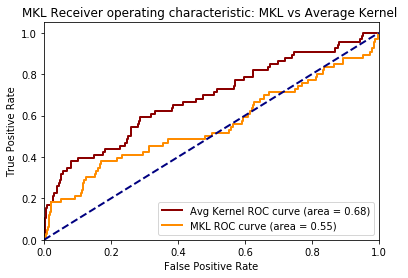

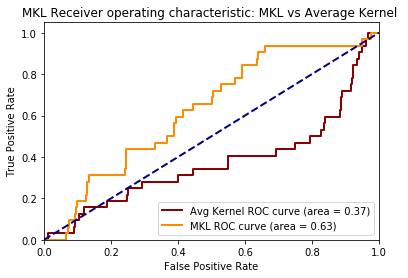

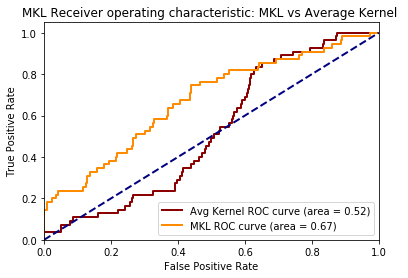

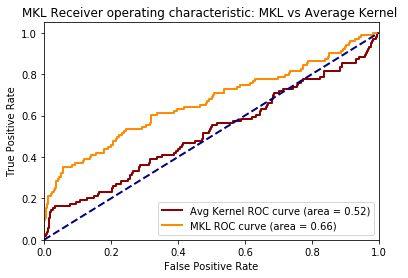

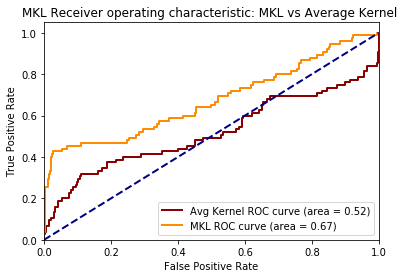

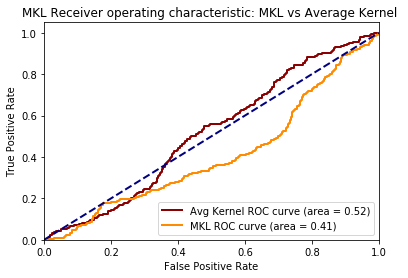

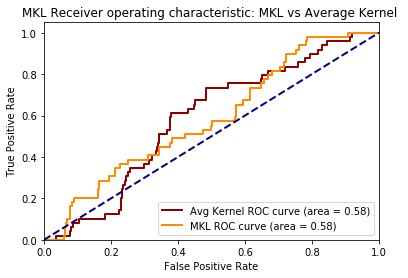

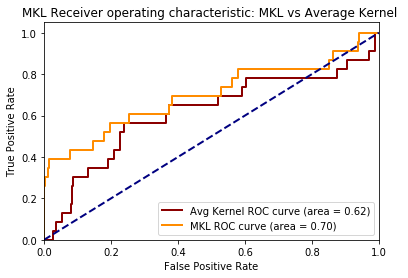

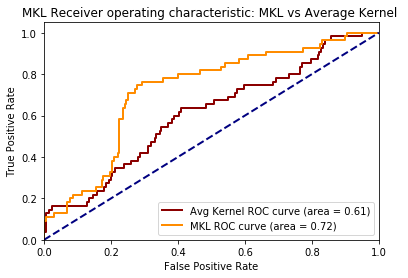

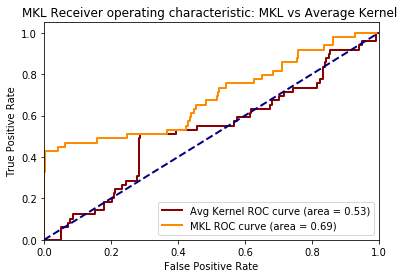

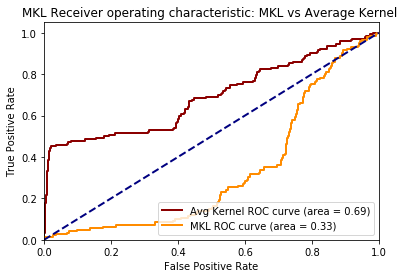

In [159]:
idx=14
## multiple kernel ##
destinationFolder = '/home/ak/Documents/Research/Papers/figures/'
for idx in range(1, 25):
    tprMKL = tprList[idx]
    fprMKL = fprList[idx]
    ## average kernel ##
    tprAVG =avgtprList[idx]
    fprAVG = avgfprList[idx]
    fig = ROC_Graph(fprAVG, tprAVG,fprMKL, tprMKL)
    fileLoc = "".join((destinationFolder,"".join((str(idx),'AUC.png') )))
    
    plt.savefig(fileLoc)


In [158]:
fileLoc

'/home/ak/Documents/Research/Papers/figures/24AUC.png'